In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

plt.style.use('seaborn')

<ipython-input-1-81149f954a15>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/apr.csv"

apr = pd.read_csv(path)

In [ ]:
# Read in data
apr.drop(columns='Unnamed: 0', inplace=True)

# Split review dates by year, month and day (strings)
time_split = apr.review_date.str.split('-', n=2, expand=True)
apr['year'] = time_split[0]
apr['month'] = time_split[1]
apr['day'] = time_split[2]

# Convert review dates into a datetime object
dates = apr.review_date
apr.review_date = [d.date() for d in pd.to_datetime(dates)]

# Extract month and year from review dates
apr['month_year'] = pd.to_datetime(apr['review_date']).dt.to_period('M')

In [ ]:
# Empirical cumulative distribution functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

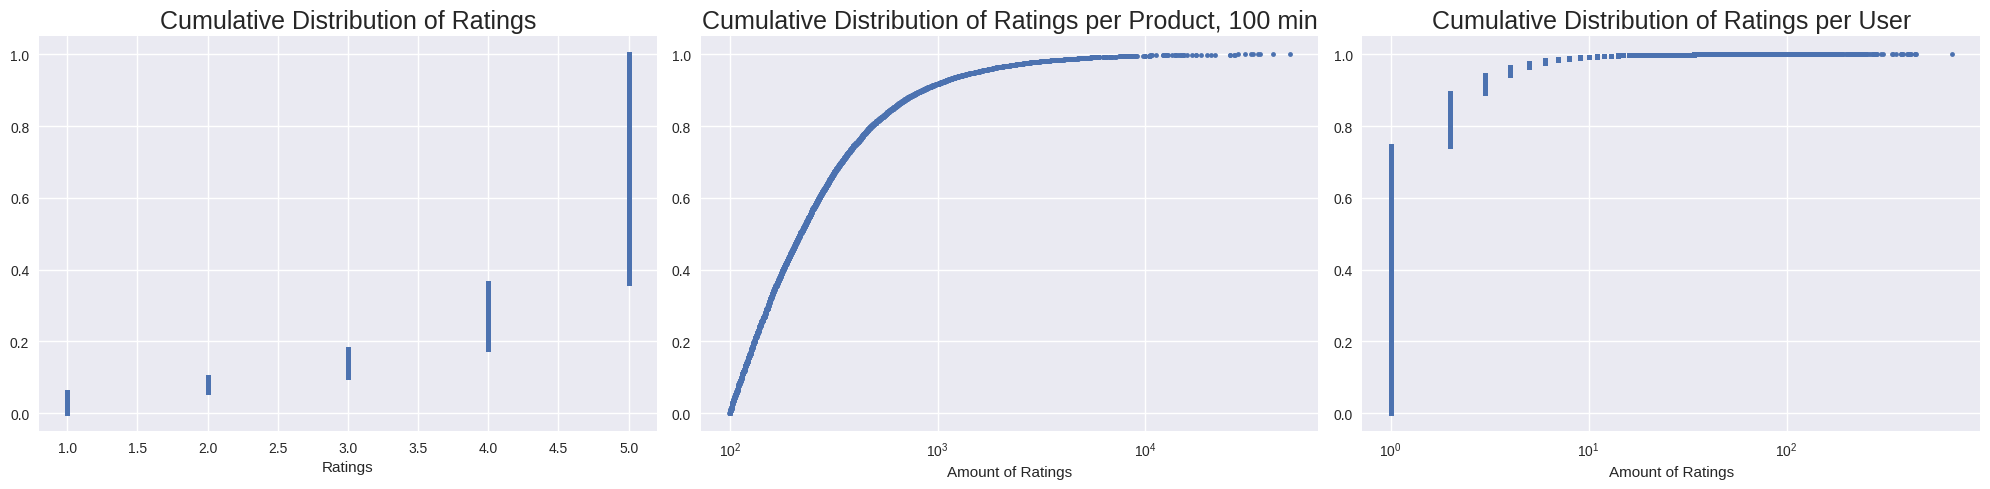

In [ ]:
plt.figure(figsize=(20,5))

# Plot cumulative distribution of ratings
x, y = ecdf(apr.star_rating)

ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Ratings')
ax1.set_title('Cumulative Distribution of Ratings', fontsize=18)
plt.plot(x, y, marker='.', linestyle='none')


# Plot cumulative distribution of ratings per product, 100 minimum
x, y = ecdf(apr.groupby('product_id').star_rating.count())

ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Amount of Ratings')
ax2.plot(x, y, marker='.', linestyle='none')
ax2.set_xscale('log');
ax2.set_title('Cumulative Distribution of Ratings per Product, 100 min', fontsize=18)


# Plot cumulative distribution of ratings per user
x, y = ecdf(apr.groupby('customer_id').star_rating.count())

ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Amount of Ratings')
ax3.plot(x, y, marker='.', linestyle='none')
ax3.set_xscale('log');
ax3.set_title('Cumulative Distribution of Ratings per User', fontsize=18)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Distribution of Customer Rating Frequency

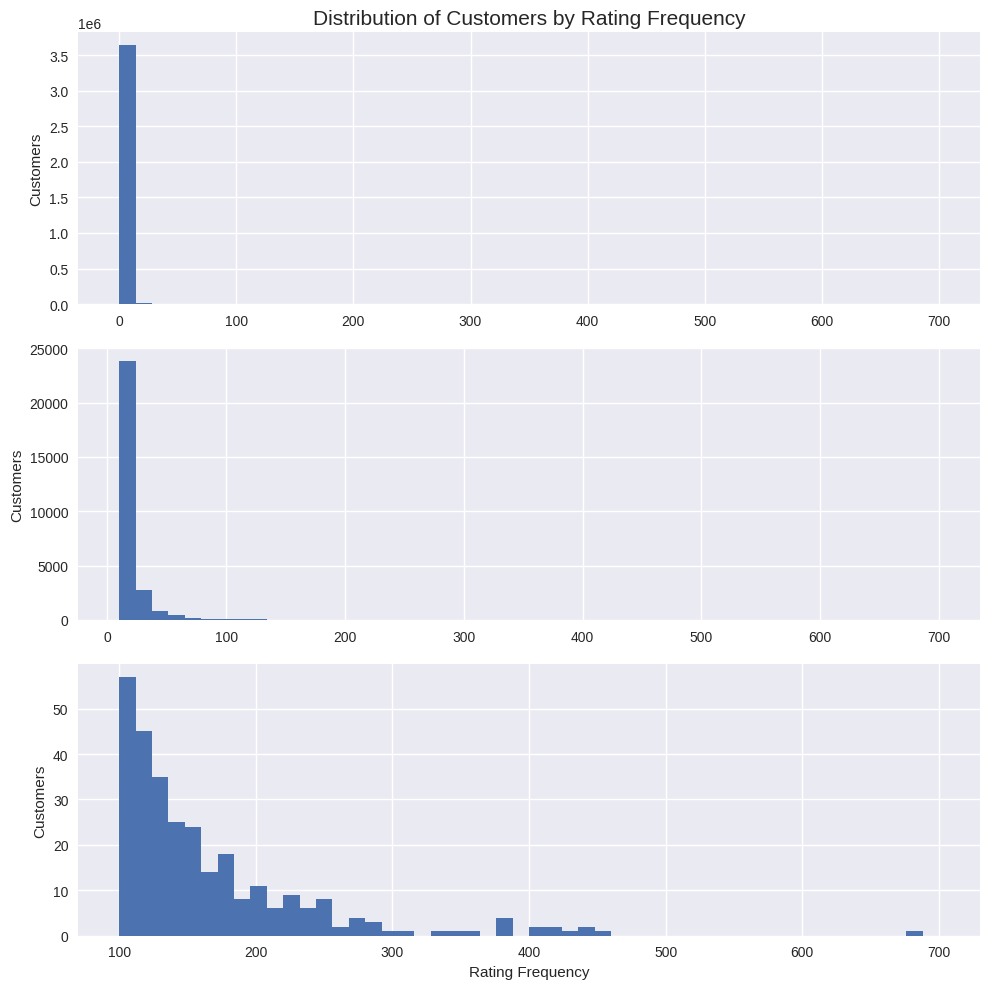

In [ ]:
# Plot distribution of amount of ratings per user
plt.figure(figsize=(10,10))

ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

apr.customer_id.value_counts().plot(kind='hist', bins=50, range=(0,700), ax=ax1)
apr.customer_id.value_counts().plot(kind='hist', bins=50, range=(10,700), ax=ax2)
apr.customer_id.value_counts().plot(kind='hist', bins=50, range=(100,700), ax=ax3)

ax1.set_title('Distribution of Customers by Rating Frequency', fontsize=15)
ax1.set_ylabel('Customers')
ax2.set_ylabel('Customers')
ax3.set_ylabel('Customers')
ax3.set_xlabel('Rating Frequency')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

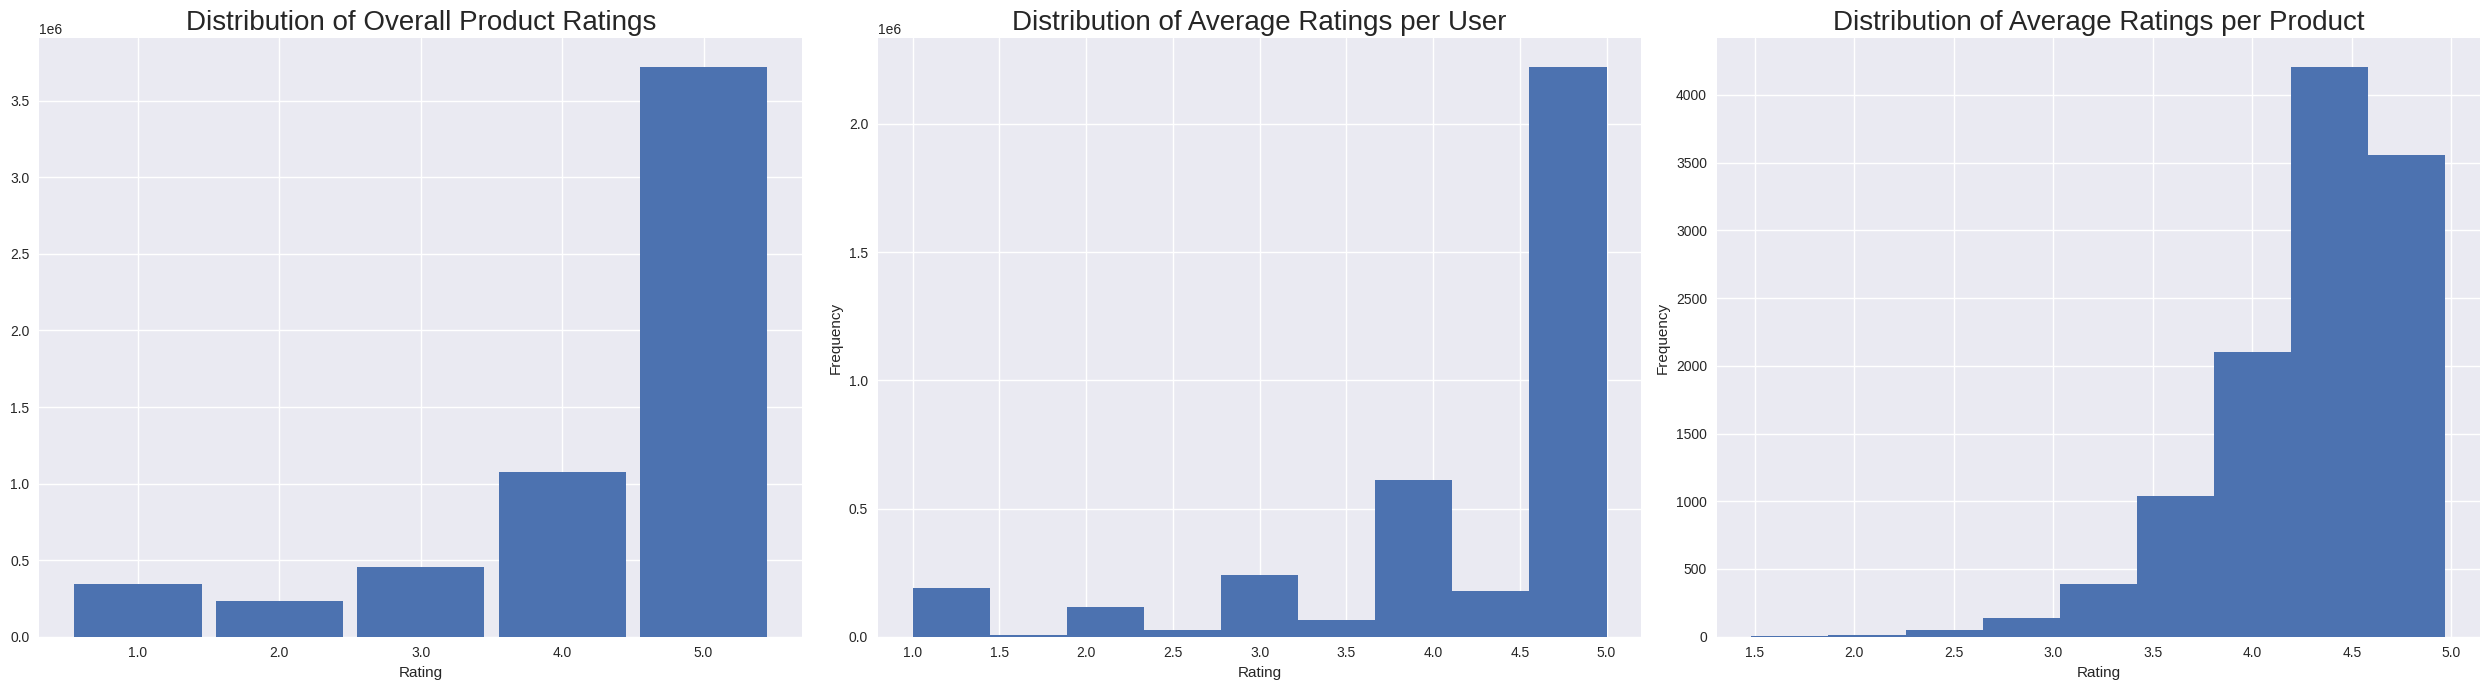

In [ ]:
plt.figure(figsize=(25,7))

# Plot distribution of overall product ratings
ax1 = plt.subplot(1,3,1)
apr.star_rating.value_counts().sort_index().plot.bar(width=0.9, ax=ax1)
ax1.set_title('Distribution of Overall Product Ratings', fontsize=20)
ax1.set_xlabel('Rating')
plt.xticks(rotation=0)

# Plot user distribution by average rating
ax2 = plt.subplot(1,3,2)
apr.groupby('customer_id').star_rating.mean().plot(kind='hist', bins=9, ax=ax2)
ax2.set_title('Distribution of Average Ratings per User', fontsize=20)
ax2.set_xlabel('Rating')

# Plot distribution of overall ratings among products
ax3 = plt.subplot(1,3,3)
apr.groupby('product_id').star_rating.mean().plot(kind='hist', bins=9, ax=ax3)
ax3.set_title('Distribution of Average Ratings per Product', fontsize=20)
ax3.set_xlabel('Rating')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

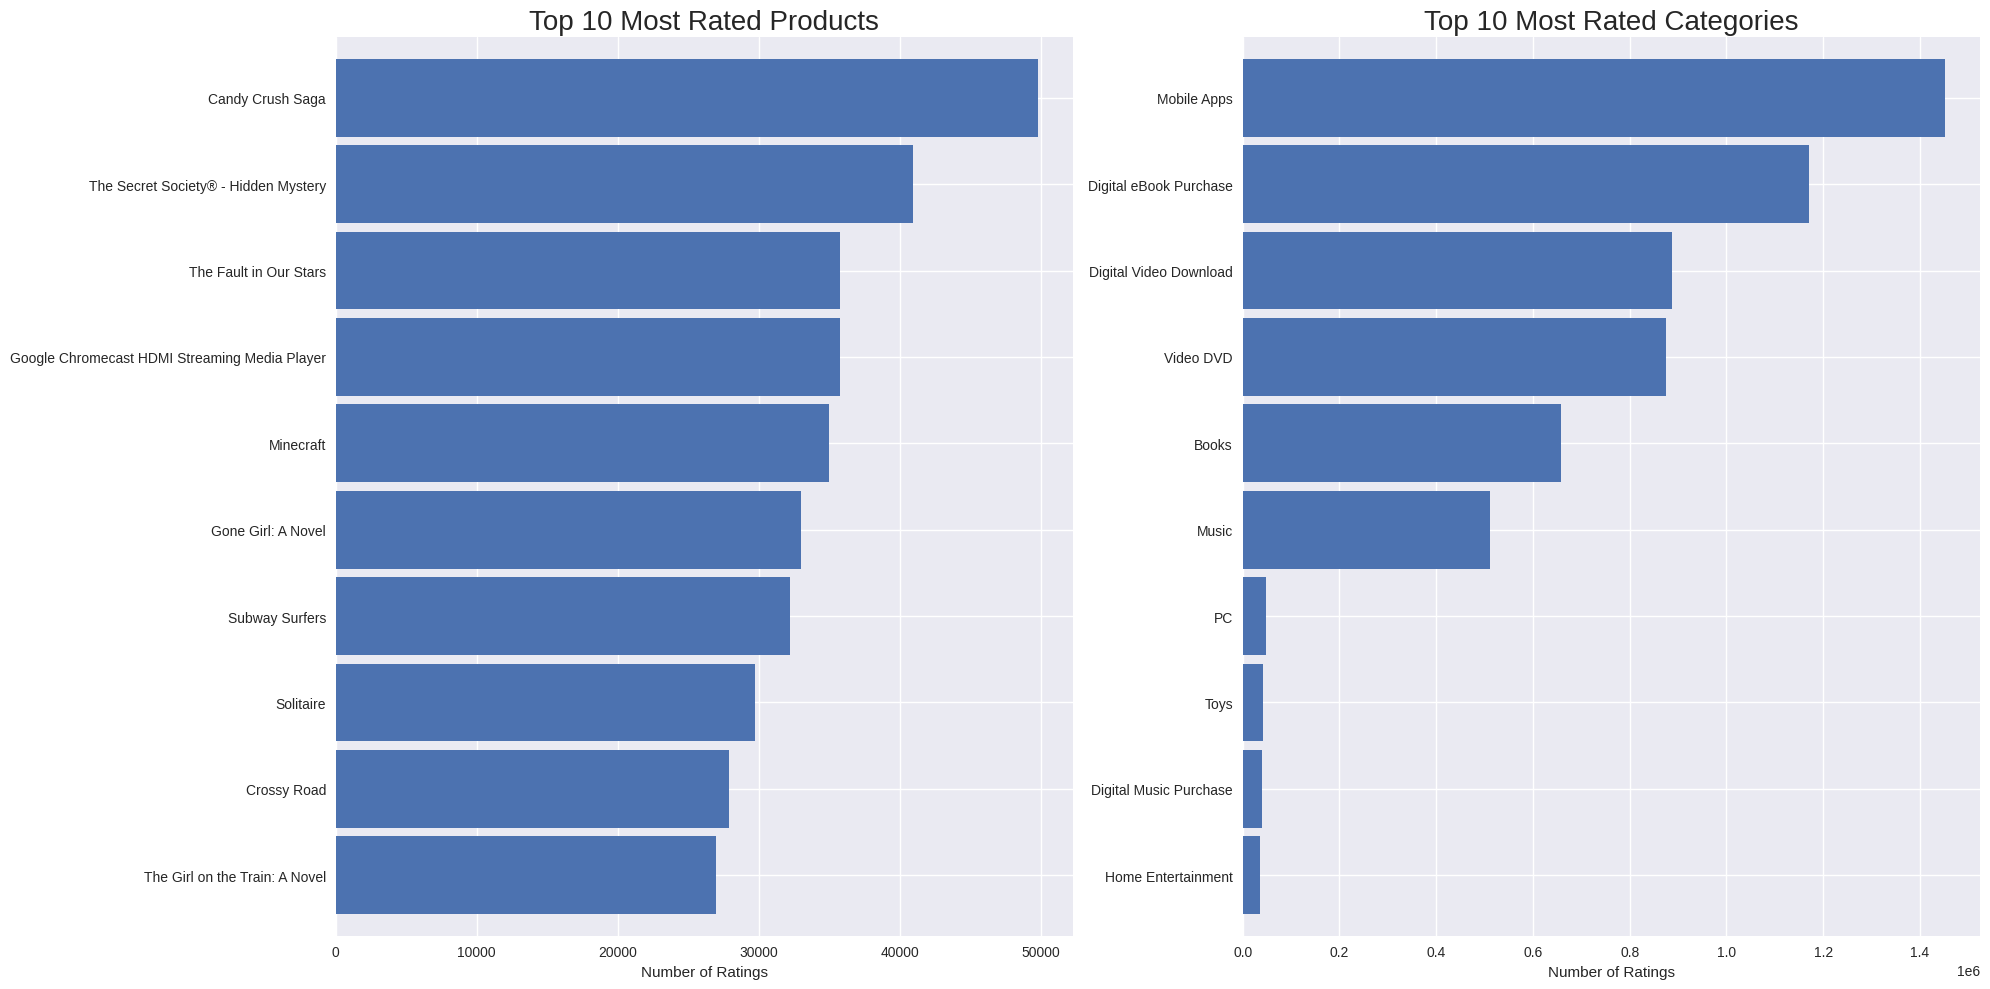

In [ ]:
plt.figure(figsize=(20,10))

# Plot 10 most common products purchased
ax1 = plt.subplot(1,2,1)
apr.product_title.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax1)
ax1.set_xlabel('Number of Ratings')
ax1.set_title('Top 10 Most Rated Products', fontsize=20)

# Plot 10 most common categories purchased
ax2 = plt.subplot(1,2,2)
apr.product_category.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax2)
ax2.set_xlabel('Number of Ratings')
ax2.set_title('Top 10 Most Rated Categories', fontsize=20)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Top 3 of Each Category

In [ ]:
# Create list of top 6 categories
categories = list(apr.product_category.value_counts().index[:6])

# Group dataset by product category and title and find the mean for star rating
top = apr.groupby(['product_category', 'product_title']).mean().reset_index()

# Convert purchase count to integer
top['purchased_counts'] = top['purchased_counts'].astype('int64')

# Print the top 3 most rated products for each category
for category in categories:
    print('Top 3 Most Common Products Rated in {}'.format(category))
    print(top[top.product_category == category].
          nlargest(3, columns='purchased_counts')[['product_title', 'star_rating', 'purchased_counts']].
          set_index('product_title'))
    print('-------------------------------------')
    print('\n')

Top 3 Most Common Products Rated in Mobile Apps
                                      star_rating  purchased_counts
product_title                                                      
Candy Crush Saga                         4.404145             49789
The Secret Society® - Hidden Mystery     4.086535             40945
Minecraft                                4.542324             34968
-------------------------------------


Top 3 Most Common Products Rated in Digital eBook Purchase
                                star_rating  purchased_counts
product_title                                                
Gone Girl: A Novel                 3.913519             33014
The Fault in Our Stars             4.697028             29542
The Girl on the Train: A Novel     4.043113             26930
-------------------------------------


Top 3 Most Common Products Rated in Digital Video Download
                        star_rating  purchased_counts
product_title                                     

<ipython-input-11-0b7986aa9bed>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top = apr.groupby(['product_category', 'product_title']).mean().reset_index()


### Average Rating per Category

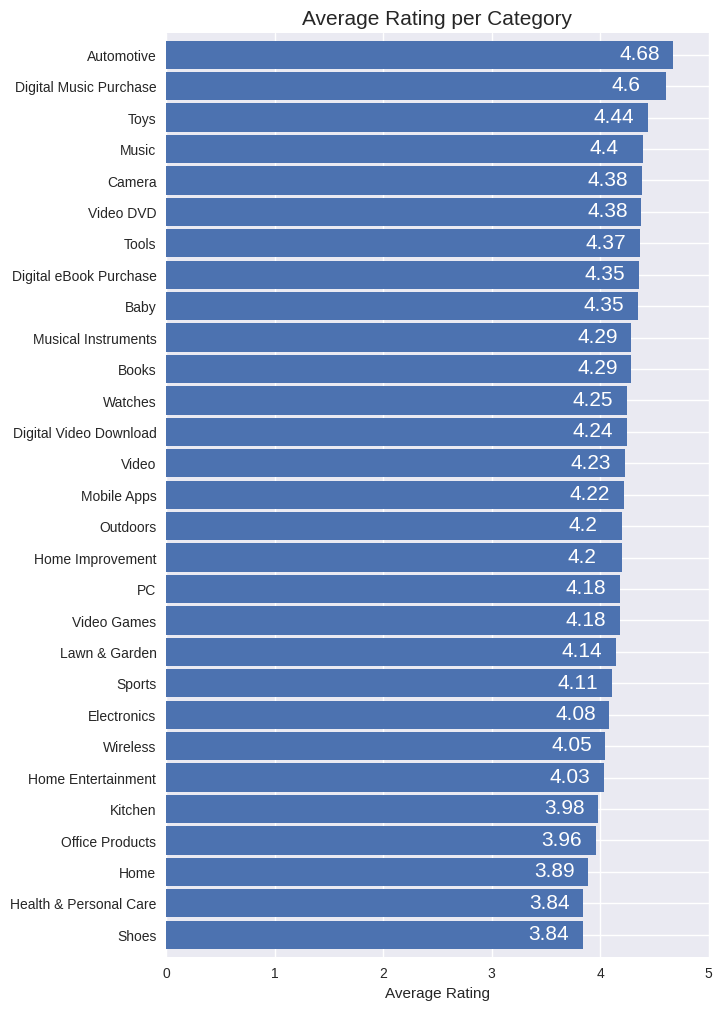

In [ ]:
plt.figure(figsize=(7,12))

# Plot average rating by product category
ax = apr.groupby('product_category').star_rating.mean().sort_values().plot.barh(width=0.9)
ax.set_title('Average Rating per Category', fontsize=15)
ax.set_xlim(0, 5)
ax.set_ylabel('')
ax.set_xlabel('Average Rating')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='white')

plt.show()

### Breakdown of Ratings by Product Category

<ipython-input-13-8f4d3da404b6>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])


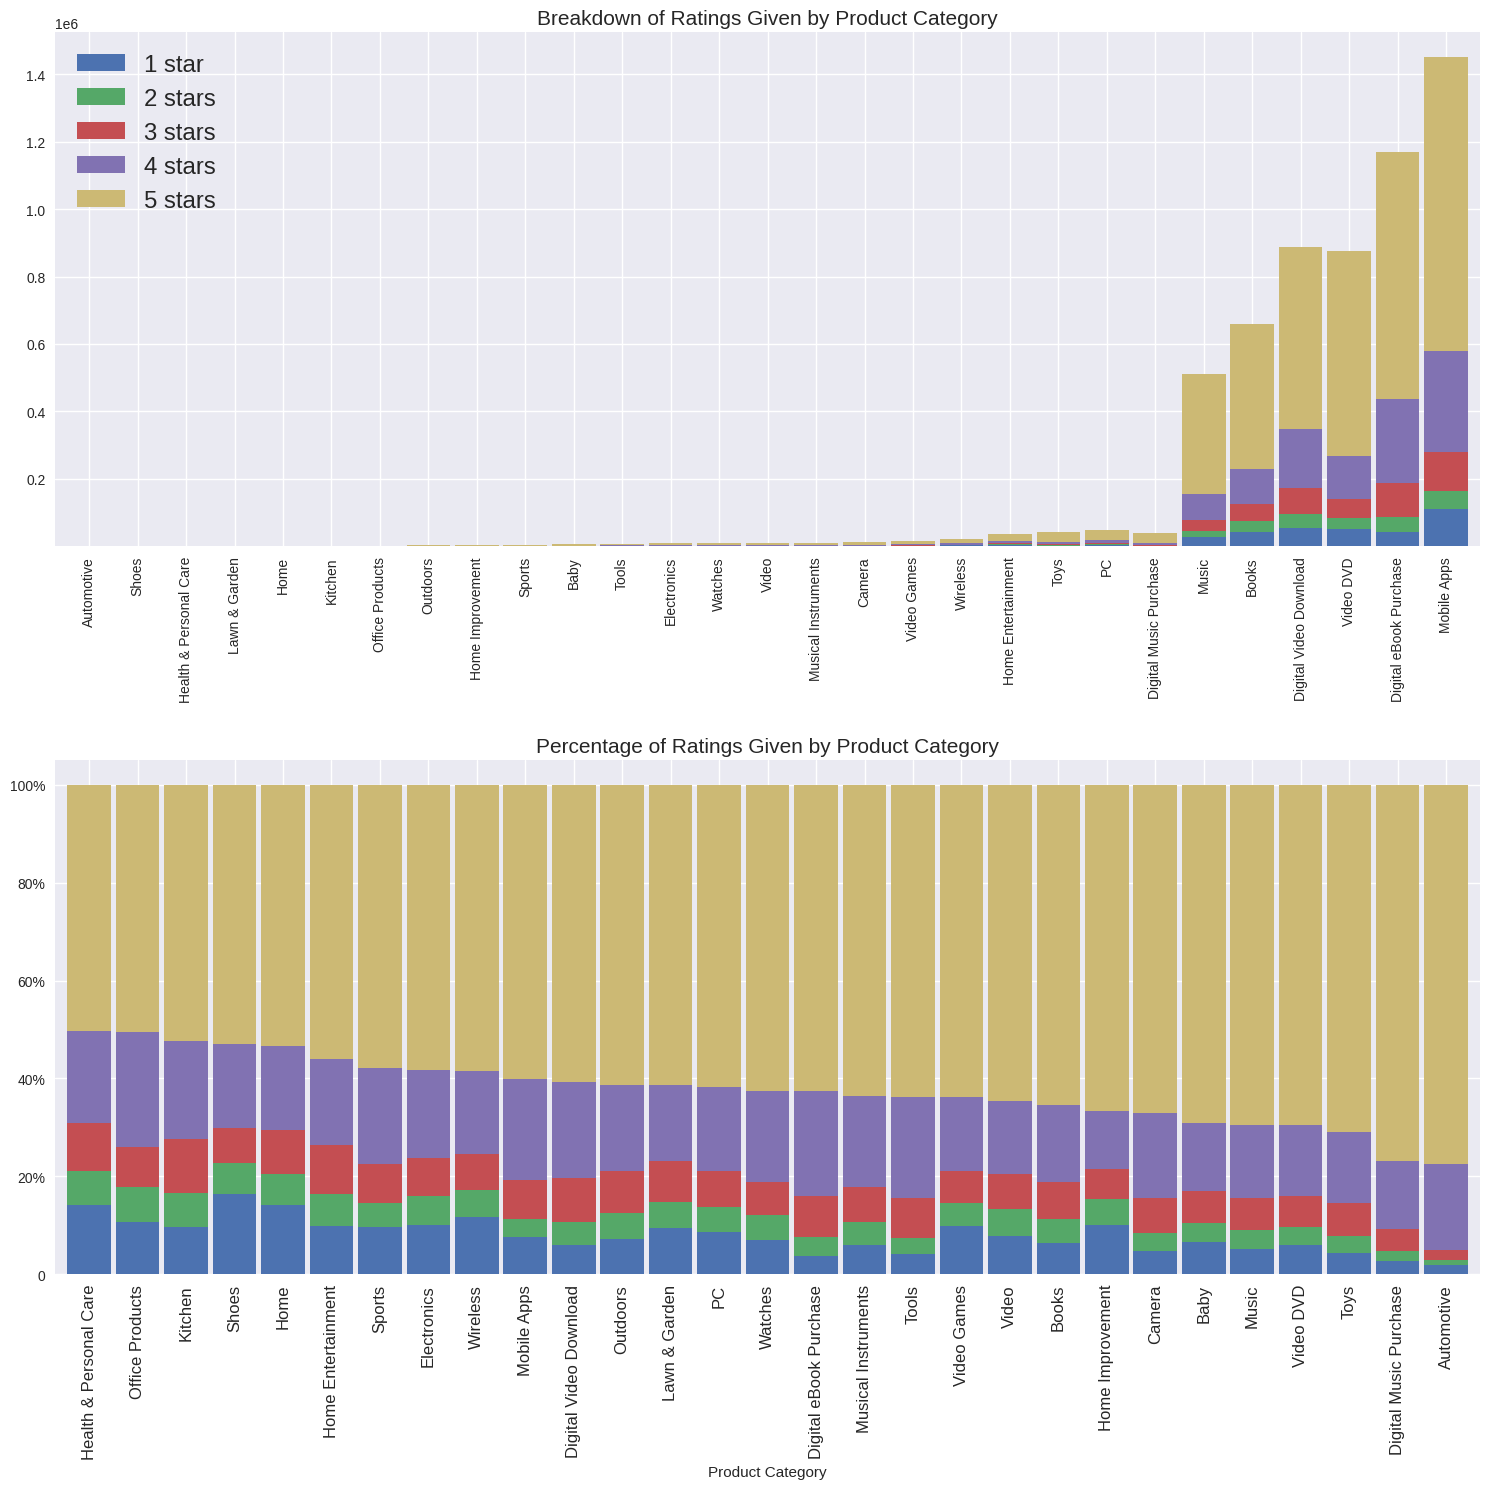

In [ ]:
# Group dataset by product category and star ratings and count amount of ratings for each
grouped = apr.groupby(['product_category', 'star_rating']).count().reset_index()

# Pivot dataset to display how many of each rating a product category received
g_pivot = grouped.pivot(index='product_category', columns='star_rating', values='customer_id')

plt.figure(figsize=(15,15))

# Plot breakdown of total ratings given by product category
ax1 = plt.subplot(2,1,1)
g_pivot.sort_values(by=5.0).plot.bar(stacked=True, width=0.9, ax=ax1)
ax1.set_xlabel(' ')
ax1.set_title('Breakdown of Ratings Given by Product Category', fontsize=15)
ax1.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], loc='upper left', fontsize='xx-large')

# Plot breakdown percentage of ratings given by product category
ax2 = plt.subplot(2,1,2)
g_pivot.loc[:,1.0:5.0].div(g_pivot.sum(axis=1), axis=0).sort_values(by=5.0).plot.bar(stacked=True, width=0.9, ax=ax2)
ax2.set_title('Percentage of Ratings Given by Product Category', fontsize=15)
ax2.set_xlabel('Product Category')
ax2.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])
ax2.legend().remove()
plt.xticks(fontsize=12)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Annual Averages

<ipython-input-14-184787944579>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot('year', 'star_rating', data=apr.groupby('year').mean().reset_index().sort_values('year'), linewidth=3)
<ipython-input-14-184787944579>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot('year', 'star_rating', data=apr.groupby('year').median().reset_index().sort_values('year'), linewidth=3)


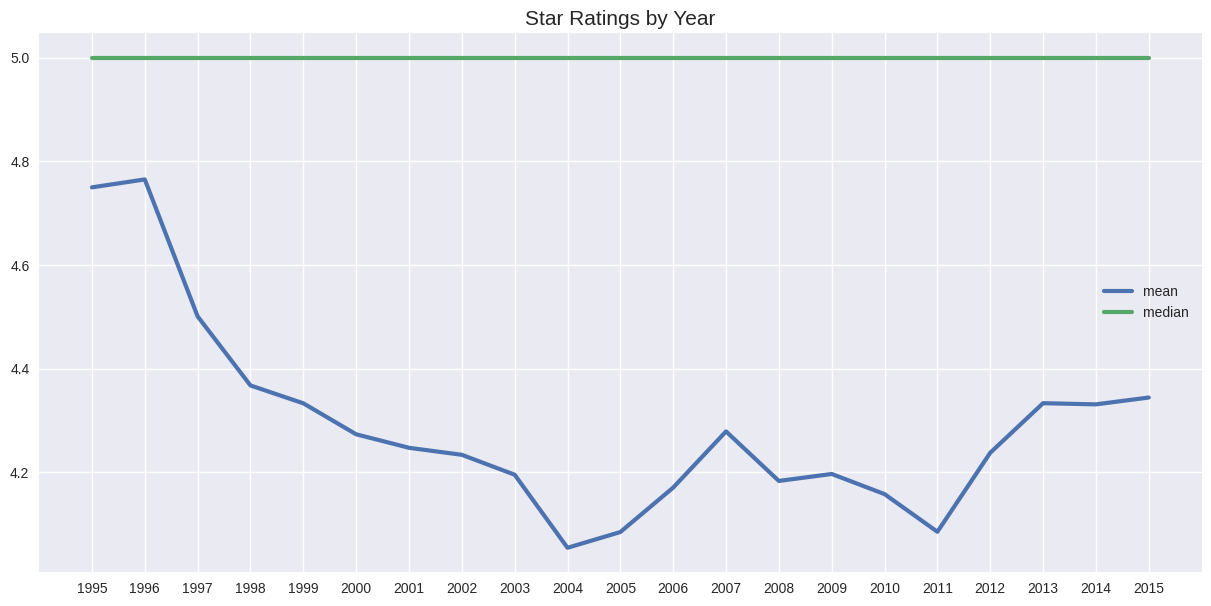

In [ ]:
plt.figure(figsize=(15,7))
# Plot average star ratings by year
plt.plot('year', 'star_rating', data=apr.groupby('year').mean().reset_index().sort_values('year'), linewidth=3)

# Plot median star ratings by year
plt.plot('year', 'star_rating', data=apr.groupby('year').median().reset_index().sort_values('year'), linewidth=3)

plt.legend(['mean', 'median'], loc='right')
plt.title('Star Ratings by Year', fontsize = 15)
sns.despine(top=True, right=True)
plt.show()

### Number of Ratings per Year

Last recorded rating was on 2015-08-31


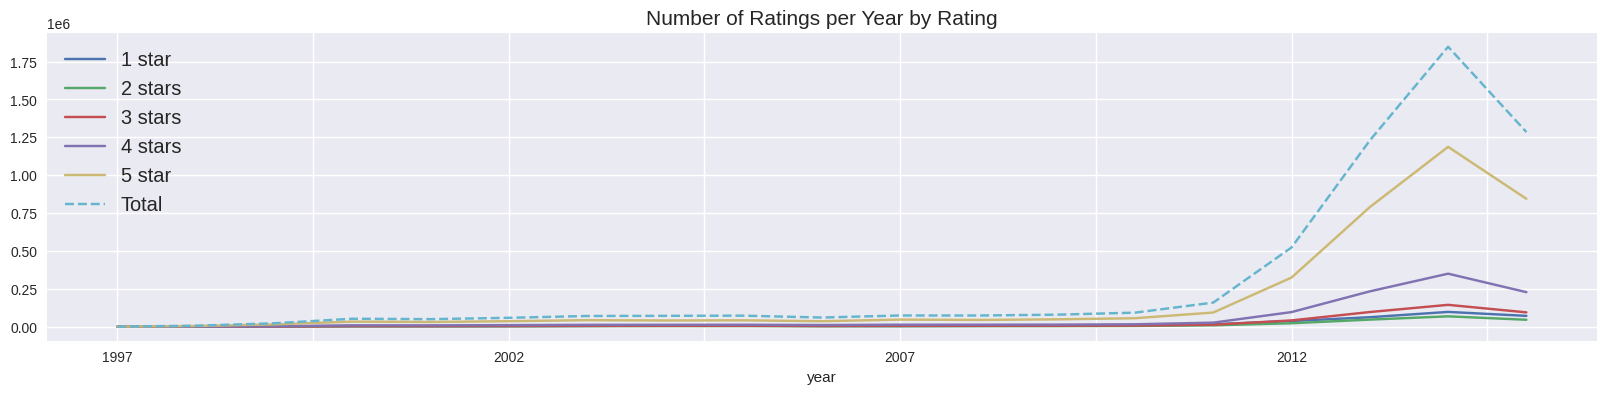

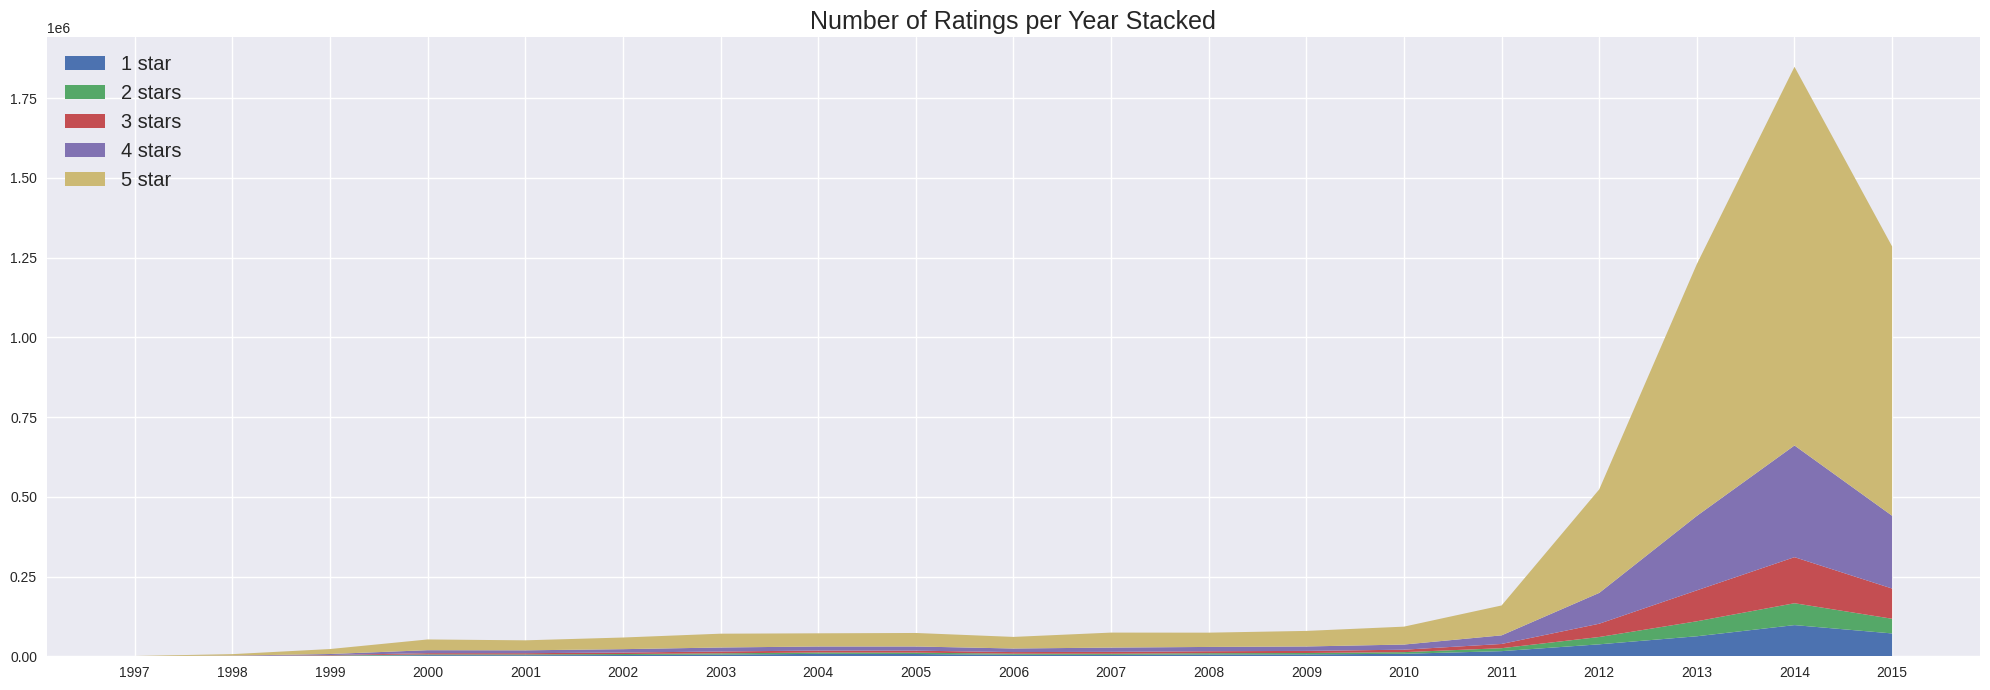

In [ ]:
plt.figure(figsize=(20,4))

# Find last rating date
print('Last recorded rating was on {}'.format(apr.review_date.tail(1).iloc[0]))

# Make sure all ratings have the same time frame
time = ['1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015']

# Separate ratings
one = apr[apr.star_rating == 1.0]
two = apr[apr.star_rating == 2.0]
three = apr[apr.star_rating == 3.0]
four = apr[apr.star_rating == 4.0]
five = apr[apr.star_rating == 5.0]

# Plot number of ratings per year per rating
one.groupby('year').count().star_rating[1:].plot()
two.groupby('year').count().star_rating[1:].plot()
three.groupby('year').count().star_rating.plot()
four.groupby('year').count().star_rating[2:].plot()
five.groupby('year').count().star_rating[2:].plot()

# Plot number of ratings per year
plt.plot(apr.groupby('year').count().star_rating[2:], linestyle='--')
plt.title('Number of Ratings per Year by Rating', fontsize=15)

plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 star', 'Total'], loc='upper left', fontsize='x-large')
sns.despine(top=True, right=True)
plt.show()

# Plot number of ratings per year per rating
plt.figure(figsize=(20,7))
plt.stackplot(time,
              one.groupby('year').count().star_rating[1:],
              two.groupby('year').count().star_rating[1:],
              three.groupby('year').count().star_rating,
              four.groupby('year').count().star_rating[2:],
              five.groupby('year').count().star_rating[2:])
plt.title('Number of Ratings per Year Stacked', fontsize=18)

plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 star'], loc='upper left', fontsize='x-large')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Monthly Rating Distributions

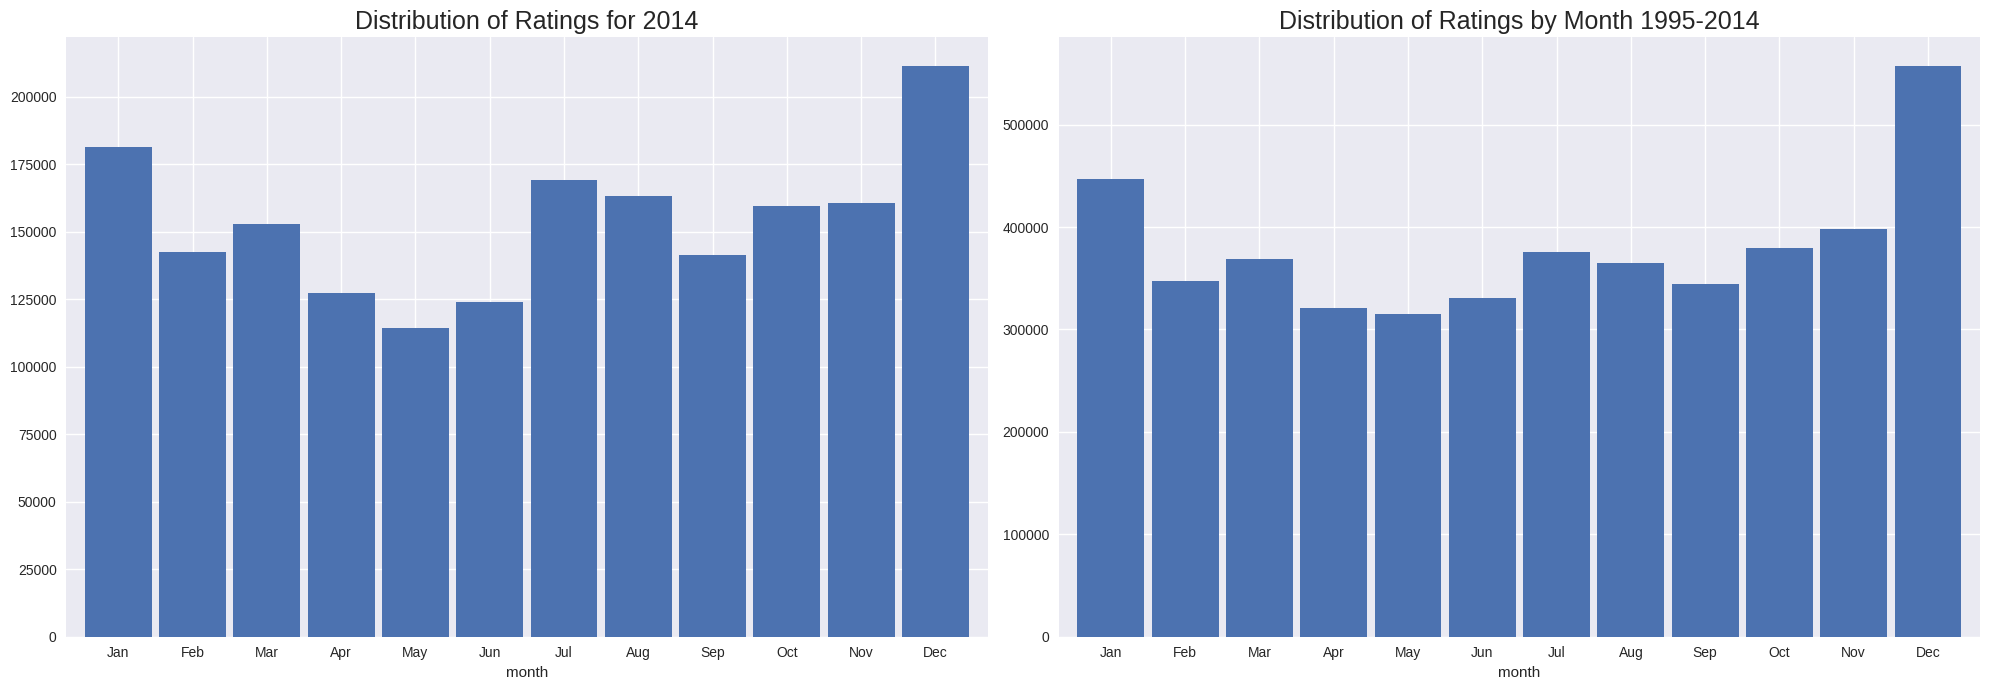

In [ ]:
plt.figure(figsize=(20,7))

# Prepare xtick labels for months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot distribution of ratings for 2014
m = apr.groupby(['year','month']).count().reset_index()
ax1 = plt.subplot(1,2,1)
m[m.year == '2014'].set_index('month').star_rating.plot(kind='bar', width=0.9, ax=ax1)
ax1.set_xticklabels(months)
ax1.set_title('Distribution of Ratings for 2014', fontsize=18)
plt.xticks(rotation=0)

# Plot distribution of ratings per month
ax2 = plt.subplot(1,2,2)
apr[apr.year != '2015'].groupby('month').count().customer_id.plot(kind='bar', width=0.9, ax=ax2)
ax2.set_xticklabels(months)
ax2.set_title('Distribution of Ratings by Month 1995-2014', fontsize=18)
plt.xticks(rotation=0)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Breakdown of Monthly Rating Distributions

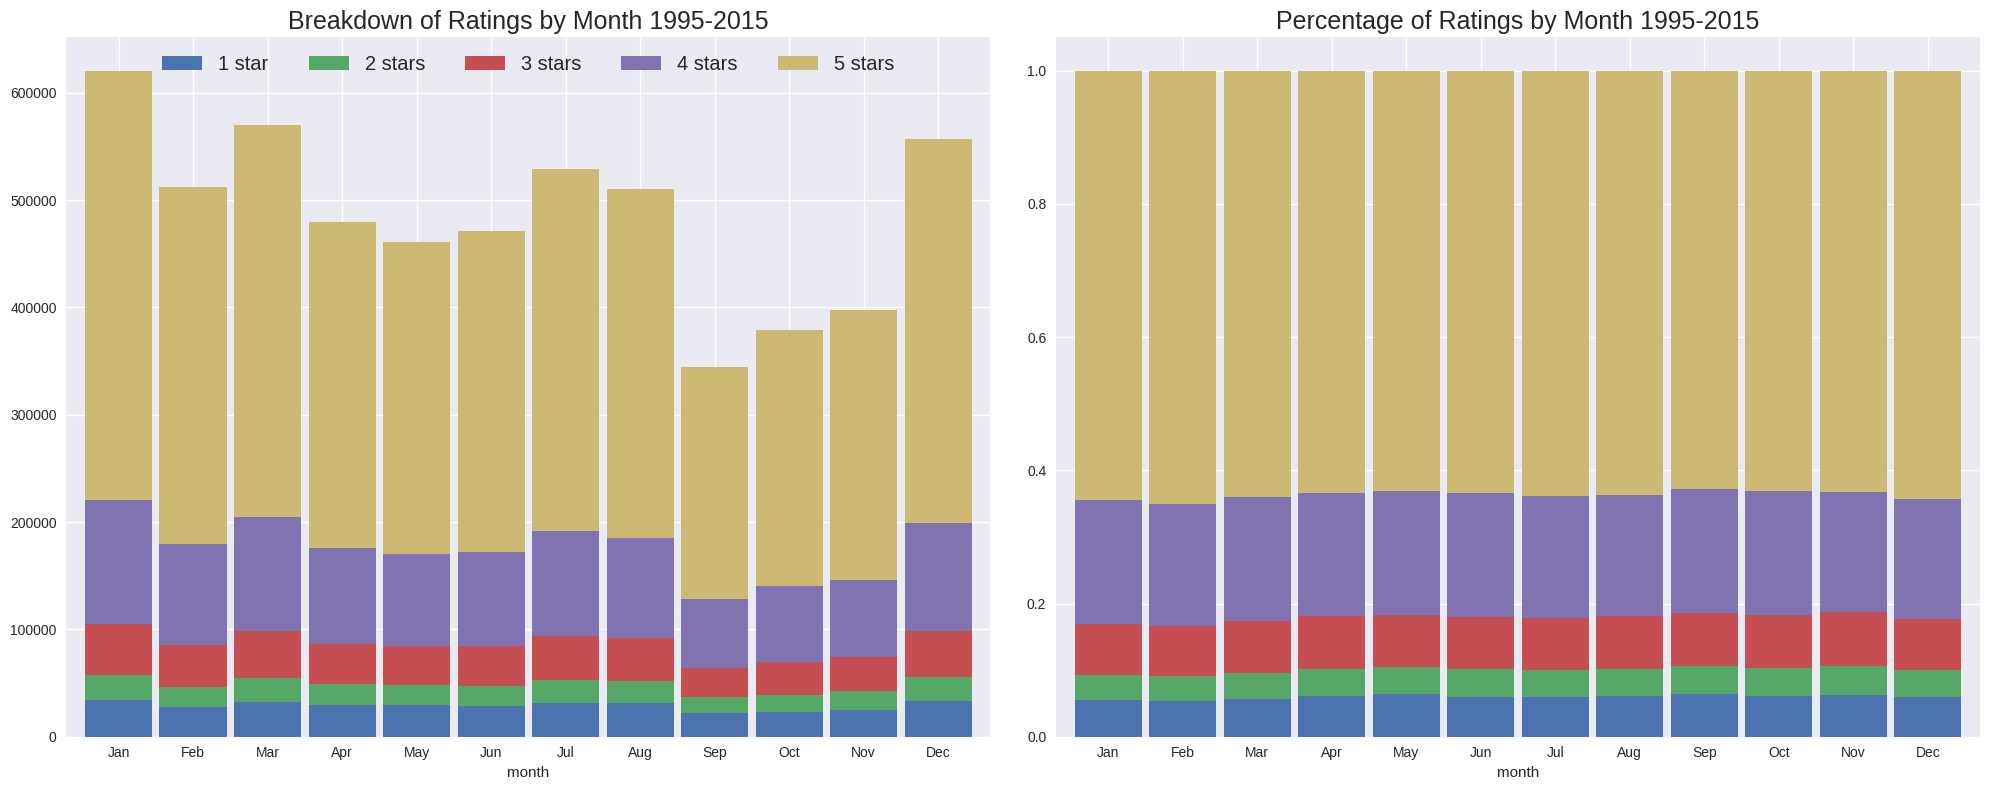

In [ ]:
plt.figure(figsize=(20,8))

# Group dataset by month and star rating, then pivot to have amount of star ratings by month
group_month = apr.groupby(['month', 'star_rating']).count().reset_index()
gmon_pivot = group_month.pivot(index='month', columns='star_rating', values='customer_id')

# Plot breakdown of total ratings per month
ax1 = plt.subplot(1,2,1)
gmon_pivot.plot.bar(stacked=True, width=0.9, ax=ax1)
ax1.set_xticklabels(months)
ax1.set_title('Breakdown of Ratings by Month 1995-2015', fontsize=18)
plt.xticks(rotation=0)
plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], loc='upper center', ncol=5, fontsize='x-large')

# Plot breakdown percentage of total ratings per month
ax2 = plt.subplot(1,2,2)
gmon_pivot.loc[:,1.0:5.0].div(gmon_pivot.sum(axis=1), axis=0).plot.bar(stacked=True, width=0.9, ax=ax2)
ax2.set_xticklabels(months)
ax2.set_title('Percentage of Ratings by Month 1995-2015', fontsize=18)
plt.xticks(rotation=0)
plt.legend().remove()

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()